In [63]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
try:
    from IPython.core.display import clear_output
    have_ipython = True
except ImportError:
    have_ipython = False
import sys
def likehoodScore(proba,y):
    return np.sum(proba * y)/proba.shape[0]

        
        
        

In [64]:
from custom import FootballDataHelper
#alpha, hidden size, score, weighted Score
output = []
c = FootballDataHelper(recentNum=4)
c.readFootBallData("E0_1415.csv")
c.readFootBallData("E0.csv")
print(c.teamsMap)
#c.fit()
#c.fit()
#X, y = c.formatData(c.df)
#print(X)
X, y =c.getH2()


ImportError: cannot import name 'FootballDataHelper'

In [4]:
print(X)
print(y.shape[0])

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
668


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.learning_curve import learning_curve
from custom import SoftMaxMLPClassifier
hiddenNodes = int(3+X.shape[1]*2/3)
print(hiddenNodes)
mlp = SoftMaxMLPClassifier(hidden_layer_sizes=(hiddenNodes,), activation='logistic', algorithm='l-bfgs', alpha=0.01, 
              learning_rate_init=0.01,learning_rate='adaptive' ,max_iter=500,early_stopping = True,verbose = 3)


33


/home/y/scikit-learn/sklearn/learning_curve.py:23: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [6]:
print ("start learning")
sys.stdout.flush()
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp, 
                       X=X, 
                      y=y, 
                      train_sizes=np.linspace(0.1, 1.0, 3), 
                      cv=10,
                     n_jobs=1,verbose=3)
print("finishing")   
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

start learning
[learning_curve] Training set sizes: [ 60 330 601]
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.373134 -   0.4s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.313433 -   1.1s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.328358 -   1.6s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.343284 -   0.3s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.388060 -   1.0s
[CV] no parameters to be set .........................................
[CV] ................ no parameters to be set, score=0.417910 -   1.5s
[CV] no parameters to be set .........................................
[CV] ......

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.1s finished


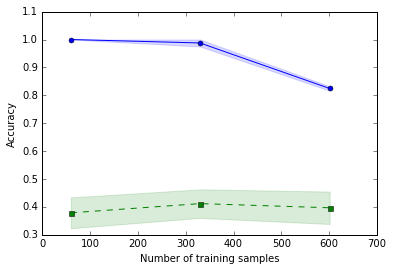

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
def plotCurve(train_mean, train_std,test_mean,test_std,sizes):
    plt.plot(train_sizes, train_mean, 
            color='blue', marker='o', 
            markersize=5, 
            label='training accuracy')
    plt.fill_between(train_sizes, 
                  train_mean + train_std,
                   train_mean - train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, 
              color='green', linestyle='--', 
              marker='s', markersize=5, 
             label='validation accuracy')
    plt.fill_between(train_sizes, 
                      test_mean + test_std,
                     test_mean - test_std, 
                    alpha=0.15, color='green')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.show()
plotCurve(train_mean,train_std,test_mean,test_std,train_sizes)


In [8]:
from sklearn.cross_validation import StratifiedKFold
def crossValidate(mlp, X,y):
    y_label = np.argmax(y,axis=1)

    kfold = StratifiedKFold(y=y_label, 
                             n_folds=10,
                            random_state=1)

    scores = []
    train_scores=[]
    for k, (train, test) in enumerate(kfold):

        mlp.fit(X[train], y[train])
        score = mlp.score(X[test], y[test])
        train_scores.append(mlp.score(X[train],y[train]))
        scores.append(score)
        print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, 
                    np.bincount(y_label[train]), score))    
    return train_scores,scores



In [19]:
def lamda_test(mlp, X, y, lamdas):
    
    train_scores=[]
    test_scores=[]
    for lamda in lamdas:
        mlp.set_params(alpha= lamda)
        print(mlp.get_params())
        train_s, test_s = crossValidate(mlp,X,y)
        train_scores.append(train_s)
        test_scores.append(test_s)
        print("lamda: {}, train: {}, test: {}".format(lamda, 
                    np.mean(train_s), np.mean(test_s)) )
    return np.array(train_scores),np.array(test_scores)

l_range = np.array([0.0003,0.001,0.003,0.01,0.03,0.1,0.3])
train_scores,test_scores = lamda_test(mlp,X,y,l_range)
    

{'batch_size': 'auto', 'power_t': 0.5, 'nesterovs_momentum': True, 'validation_fraction': 0.1, 'warm_start': False, 'random_state': None, 'verbose': 3, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (33,), 'early_stopping': True, 'alpha': 0.0030000000000000001, 'beta_2': 0.999, 'activation': 'logistic', 'shuffle': True, 'beta_1': 0.9, 'momentum': 0.9, 'learning_rate': 'adaptive', 'tol': 0.0001, 'max_iter': 500, 'algorithm': 'l-bfgs', 'epsilon': 1e-08}
Fold: 1, Class dist.: [154 258 188], Acc: 0.382
Fold: 2, Class dist.: [154 258 188], Acc: 0.368
Fold: 3, Class dist.: [155 258 188], Acc: 0.478
Fold: 4, Class dist.: [155 258 188], Acc: 0.478
Fold: 5, Class dist.: [155 258 188], Acc: 0.403
Fold: 6, Class dist.: [155 258 188], Acc: 0.343
Fold: 7, Class dist.: [155 258 188], Acc: 0.358
Fold: 8, Class dist.: [155 259 188], Acc: 0.364
Fold: 9, Class dist.: [155 259 188], Acc: 0.394
Fold: 10, Class dist.: [155 259 189], Acc: 0.354
lamda: 0.003, train: 0.8241800612005671, test: 0.39211234039

(7,)
(7,)


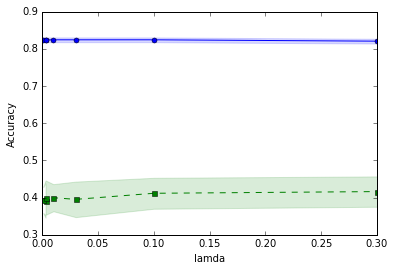

In [20]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

print(train_mean.shape)
print(l_range.shape)
#plotCurve(train_mean,train_std,test_mean,test_std,l_range)
plt.plot(l_range, train_mean, 
        color='blue', marker='o', 
        markersize=5, 
        label='training accuracy')
plt.fill_between(l_range, 
              train_mean + train_std,
               train_mean - train_std, alpha=0.15, color='blue')

plt.plot(l_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
         label='validation accuracy')
plt.fill_between(l_range, 
                  test_mean + test_std,
                 test_mean - test_std, 
                alpha=0.15, color='green')
plt.xlabel('lamda')
plt.ylabel('Accuracy')
plt.show()


In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size =0.3)



In [31]:
mlp.fit(X_train, y_train)

SoftMaxMLPClassifier(activation='logistic', algorithm='l-bfgs',
           alpha=0.29999999999999999, batch_size='auto', beta_1=0.9,
           beta_2=0.999, early_stopping=True, epsilon=1e-08,
           hidden_layer_sizes=(33,), learning_rate='adaptive',
           learning_rate_init=0.01, max_iter=500, momentum=0.9,
           nesterovs_momentum=True, power_t=0.5, random_state=None,
           shuffle=True, tol=0.0001, validation_fraction=0.1, verbose=3,
           warm_start=False)

In [51]:
res = mlp.predict_proba(X_test)


In [52]:
predicted = mlp.predict(X_test)
print(mlp.score(X_test, y_test))

0.417910447761


In [53]:
likehoodScore(res,y_test)

0.4048500334607813

In [55]:
home_teams_test = np.argmax(X_test[:,0:len(c.teamsMap)],axis=1)
away_teams_test = np.argmax(X_test[:,len(c.teamsMap):len(c.teamsMap)*2],axis=1)
inverseMap ={}
for name in c.teamsMap.keys():        
    inverseMap[c.teamsMap[name]] = name

home_name =[]
away_name =[]
for i in range(home_teams_test.shape[0]):         
    home_name.append(inverseMap[home_teams_test[i]])
    away_name.append(inverseMap[away_teams_test[i]])
pre_y = np.argmax(predicted,axis=1)
real_y = np.argmax(y_test,axis=1)
for i in range(predicted.shape[0]):
    if pre_y[i] != real_y[i]:
        print('-------------')
        print("{} vs {}".format(home_name[i],away_name[i]))
        print("{} vs {}".format(res[i],y_test[i]))
    

-------------
West Ham vs Man United
[ 0.4396892  0.5512534  0.0090574] vs [ True False False]
-------------
Liverpool vs Tottenham
[ 0.01128737  0.01162487  0.97708775] vs [False  True False]
-------------
Southampton vs Tottenham
[ 0.65228791  0.14496271  0.20274938] vs [False False  True]
-------------
Burnley vs Man City
[ 0.03346044  0.00760759  0.95893198] vs [False  True False]
-------------
Stoke vs Chelsea
[ 0.00841913  0.95565511  0.03592576] vs [False False  True]
-------------
Newcastle vs Leicester
[ 0.10665693  0.05961582  0.83372725] vs [False  True False]
-------------
Chelsea vs Stoke
[ 0.85155974  0.14392032  0.00451994] vs [False  True False]
-------------
Man United vs Man City
[ 0.00174322  0.99299642  0.00526036] vs [ True False False]
-------------
Burnley vs Crystal Palace
[ 0.4133501   0.38600537  0.20064453] vs [False False  True]
-------------
Everton vs Leicester
[ 0.91373153  0.01806048  0.068208  ] vs [False False  True]
-------------
Hull vs Chelsea
[ 0.8

In [62]:
#c.df[(c.df['HomeTeam'] == 'West Brom') | (c.df['AwayTeam']=='West Brom')]